In [1]:
# imports
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import esutil

import lsst.afw.math as afwMath
import lsst.daf.persistence as dafPersist

In [2]:
ccd = 43

In [3]:
# butler
butlerVisit = dafPersist.Butler(
    '/datasets/hsc/repo/rerun/private/erykoff/fgcm_pdr1_run1wd/wide_deep2'
)
obsTable = butlerVisit.get(
    'fgcmVisitCatalog'
)
butler = dafPersist.Butler(
    '/datasets/hsc/repo/rerun/private/erykoff/hscproc/runIsrPDR1'
)

In [4]:
# define amps
camera = butler.get('camera')
det = camera[ccd]
amp1, amp2, amp3, amp4 = det.getAmpInfoCatalog()

In [5]:
# overscan bounding boxes
obox1 = amp1.getRawHorizontalOverscanBBox()
obox2 = amp2.getRawHorizontalOverscanBBox()
obox3 = amp3.getRawHorizontalOverscanBBox()
obox4 = amp4.getRawHorizontalOverscanBBox()

In [6]:
# raw data bounding boxes
abox1 = amp1.getRawDataBBox()
abox2 = amp2.getRawDataBBox()
abox3 = amp3.getRawDataBBox()
abox4 = amp4.getRawDataBBox()

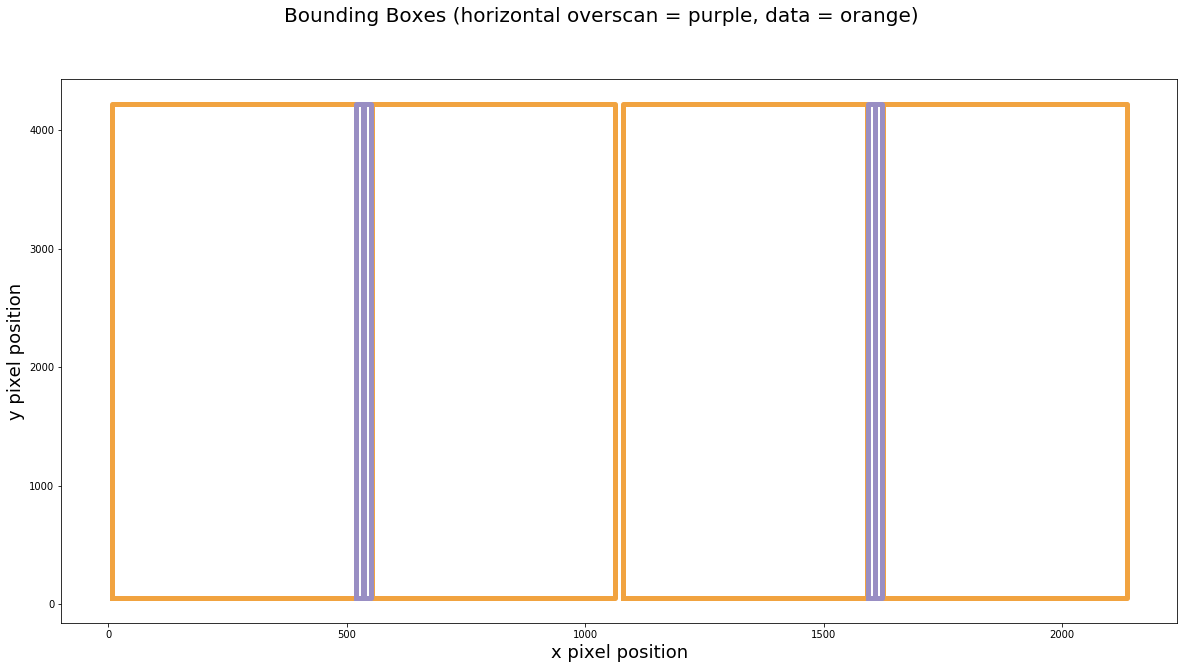

In [13]:
# bounding box plots
allocorners = np.array([obox1.getCorners(), obox2.getCorners(), obox3.getCorners(), obox4.getCorners()])
allacorners = np.array([abox1.getCorners(), abox2.getCorners(), abox3.getCorners(), abox4.getCorners()])
xx = list()
yy = list()
cc = list()
# raw vertices
for acorners in allacorners:
    x = [i[0] for i in acorners]
    y = [i[1] for i in acorners]
    x.append(x[0])
    y.append(y[0])
    xx.append(x)
    yy.append(y)
    cc.append('#f1a340')
# overscan vertices
for ocorners in allocorners:
    x = [i[0] for i in ocorners]
    y = [i[1] for i in ocorners]
    x.append(x[0])
    y.append(y[0])
    xx.append(x)
    yy.append(y)
    cc.append('#998ec3')
fig = plt.figure(figsize=(20, 10))  # specify (width,height) in inches
fig.suptitle('Bounding Boxes (horizontal overscan = purple, data = orange)', fontsize=20)
plt.xlabel('x pixel position', fontsize=18)
plt.ylabel('y pixel position', fontsize=18)
ax = fig.add_subplot(1,1,1)
#ax.set_aspect('auto') # preserve aspect ratio
#plt.rcParams["figure.figsize"] = (20,20)
for i in range(len(xx)):
    ax.plot(xx[i], yy[i], color=cc[i], linestyle='-', linewidth=5)
    #plt.plot(xx[i],yy[i],cc[i])